<a href="https://colab.research.google.com/github/Fahruddin002/Quiz-PCD/blob/main/QuizPCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# nama file yang digunakan
file_path = '/content/plat.jpeg'


In [35]:
# 1. baca gambar menggunakan opencv dan PIL
# OpenCV
original_image_cv2 = cv2.imread(file_path)

# PIL
original_image_pil = Image.open(file_path)

In [36]:
# 2. lakukan edge detection menggunakan sobel dan canny
def edge_detection_sobel(image):
    # Konversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan filter Sobel
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

    return sobel_combined

def edge_detection_canny(image):
    # Konversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Deteksi tepi menggunakan metode Canny
    canny = cv2.Canny(gray, 100, 200)

    return canny

In [37]:
# 3. lakukan cropping: random cropping dan half-size center cropping
def random_crop(image, crop_height, crop_width):
    h, w = image.shape[:2]
    top = np.random.randint(0, h - crop_height)
    left = np.random.randint(0, w - crop_width)
    bottom = top + crop_height
    right = left + crop_width
    cropped = image[top:bottom, left:right]
    return cropped

def half_size_center_crop(image):
    h, w = image.shape[:2]
    center_h, center_w = h // 2, w // 2
    cropped = image[center_h - h // 4:center_h + h // 4, center_w - w // 4:center_w + w // 4]
    return cropped

In [38]:
# 4. lakukan transformasi pada gambar: putih jadi hitam, hitam jadi putih
def transform_image(image):
    # Konversi gambar ke skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Mengganti putih menjadi hitam dan sebaliknya
    inverted = cv2.bitwise_not(gray)

    return inverted

In [39]:
# 5. tambahkan noise pada gambar original;: salt and papper noise dan
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt_pixels = np.random.rand(*image.shape[:2]) < salt_prob
    pepper_pixels = np.random.rand(*image.shape[:2]) < pepper_prob
    noisy_image[salt_pixels] = [255, 255, 255]
    noisy_image[pepper_pixels] = [0, 0, 0]
    return noisy_image

In [40]:
# 6. lakukan transformasi geometri: rotasi, flip vertikal dan hosrisontal
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def flip_image_vertical(image):
    return cv2.flip(image, 0)

def flip_image_horizontal(image):
    return cv2.flip(image, 1)

Quiz Pengolahan Citra Digital
Nama : Fahruddin A.Lebe
NIM : F55122002


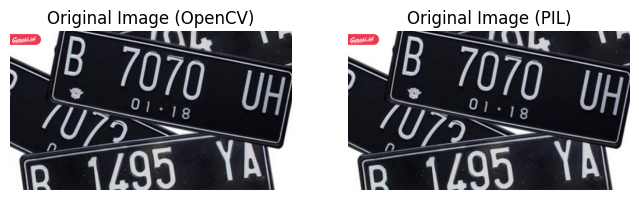

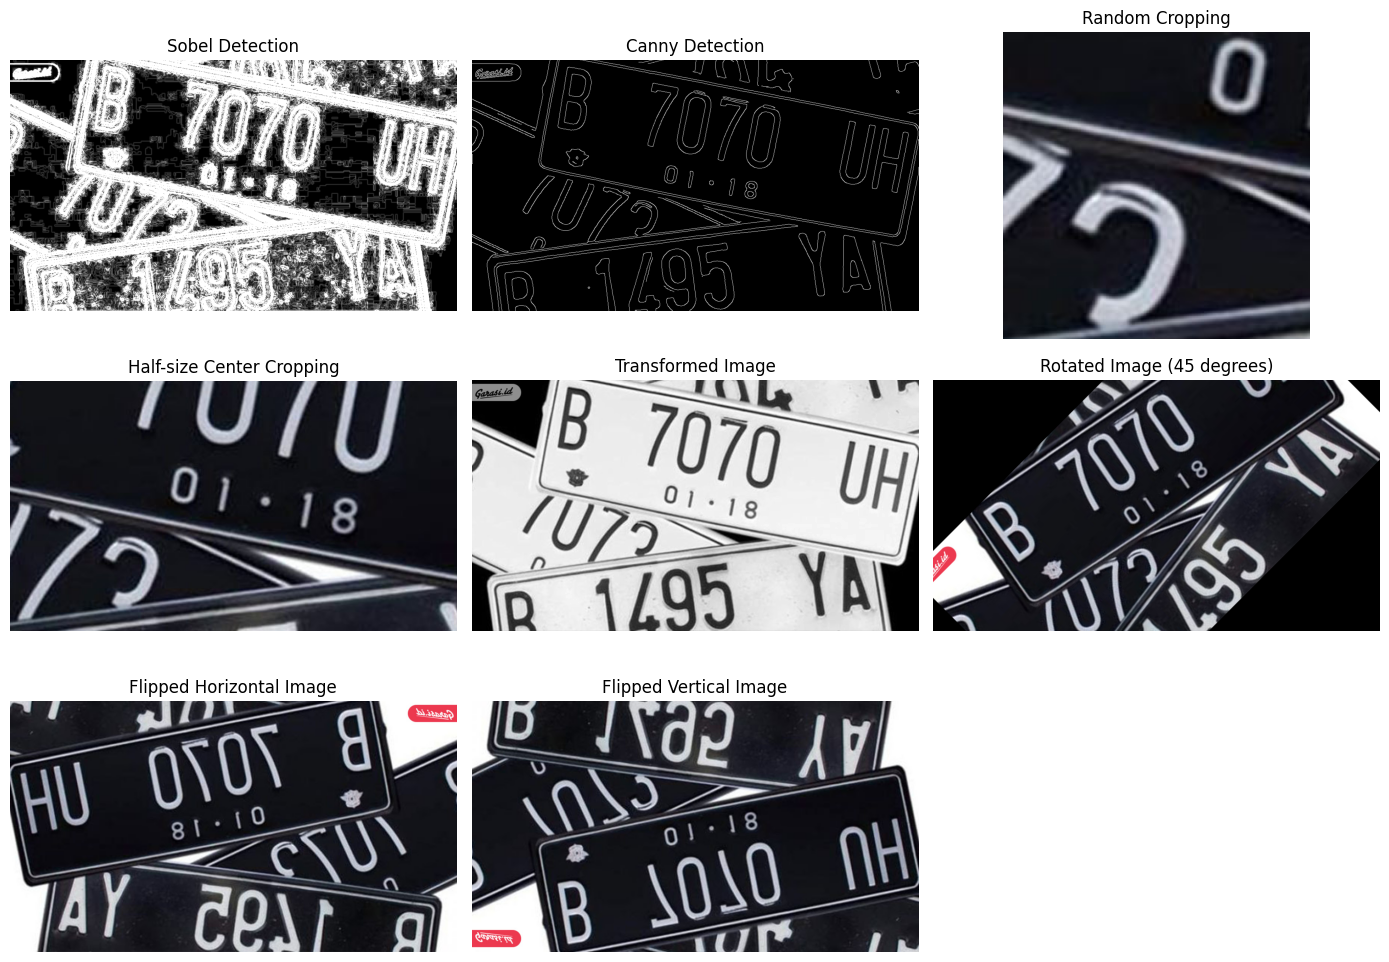

In [41]:
# main program

print ("Quiz Pengolahan Citra Digital")
print ("Nama : Fahruddin A.Lebe")
print ("NIM : F55122002")

# Tampilkan gambar original menggunakan OpenCV
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(original_image_cv2, cv2.COLOR_BGR2RGB))
plt.title('Original Image (OpenCV)')
plt.axis('off')

# Tampilkan gambar original menggunakan PIL
plt.subplot(122)
plt.imshow(original_image_pil)
plt.title('Original Image (PIL)')
plt.axis('off')

plt.show()

# Memproses gambar dan menampilkan hasil di bawahnya
sobel_edges = edge_detection_sobel(original_image_cv2)
canny_edges = edge_detection_canny(original_image_cv2)
cropped_random = random_crop(original_image_cv2, 200, 200)
cropped_center = half_size_center_crop(original_image_cv2)
transformed_image = transform_image(original_image_cv2)
rotated_image = rotate_image(original_image_cv2, angle=45)
flipped_vertical_image = flip_image_vertical(original_image_cv2)
flipped_horizontal_image = flip_image_horizontal(original_image_cv2)

plt.figure(figsize=(14, 10))

plt.subplot(331)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Detection')
plt.axis('off')

plt.subplot(332)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Detection')
plt.axis('off')

plt.subplot(333)
plt.imshow(cv2.cvtColor(cropped_random, cv2.COLOR_BGR2RGB))
plt.title('Random Cropping')
plt.axis('off')

plt.subplot(334)
plt.imshow(cv2.cvtColor(cropped_center, cv2.COLOR_BGR2RGB))
plt.title('Half-size Center Cropping')
plt.axis('off')

plt.subplot(335)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(336)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45 degrees)')
plt.axis('off')

plt.subplot(337)
plt.imshow(cv2.cvtColor(flipped_horizontal_image, cv2.COLOR_BGR2RGB))
plt.title('Flipped Horizontal Image')
plt.axis('off')

plt.subplot(338)
plt.imshow(cv2.cvtColor(flipped_vertical_image, cv2.COLOR_BGR2RGB))
plt.title('Flipped Vertical Image')
plt.axis('off')

plt.tight_layout()
plt.show()
